#### **ANALYZING POLISH BABY NAME TRENDS**

In this project I'll use data published by dane.gov.pl containing names given to Polish children from 2000 to 2021.

In [27]:
# Data is split into 5 files:
# 1. male and female names given to childen from 2000 to 2019:
# url1 = "https://api.dane.gov.pl/resources/21458,imiona-nadane-dzieciom-w-polsce-w-latach-2000-2019-imie-pierwsze/csv"

# 2. male names given in 2020:
# url2= "https://api.dane.gov.pl/resources/28020,imiona-meskie-nadane-dzieciom-w-polsce-w-2020-r-imie-pierwsze/csv"
# 
# 3. male names given in 2021:
# url3 = "https://api.dane.gov.pl/resources/36393,imiona-meskie-nadane-dzieciom-w-polsce-w-2021-r-imie-pierwsze/csv"
# 
# 4. female names given in 2020:
# url4 = "https://api.dane.gov.pl/resources/28021,imiona-zenskie-nadane-dzieciom-w-polsce-w-2020-r-imie-pierwsze/csv"
# 
# 5. female names given in 2021:
# url5 = "https://api.dane.gov.pl/resources/36394,imiona-zenskie-nadane-dzieciom-w-polsce-w-2021-r-imie-pierwsze/csv"

In [28]:
#Data is split into 5 datasets:
# 1. male and female names given to childen from 2000 to 2019
# 2. male names given in 2020
# 3. male names given in 2021
# 4. female names given in 2020
# 5. female names given in 2021

#urls to datasets are contained in 'urls' dictionary
urls = {
    "2000_2019": "https://api.dane.gov.pl/resources/21458,imiona-nadane-dzieciom-w-polsce-w-latach-2000-2019-imie-pierwsze/csv", 
    "2020_M": "https://api.dane.gov.pl/resources/28020,imiona-meskie-nadane-dzieciom-w-polsce-w-2020-r-imie-pierwsze/csv",
    "2021_M": "https://api.dane.gov.pl/resources/36393,imiona-meskie-nadane-dzieciom-w-polsce-w-2021-r-imie-pierwsze/csv",
    "2020_F": "https://api.dane.gov.pl/resources/28021,imiona-zenskie-nadane-dzieciom-w-polsce-w-2020-r-imie-pierwsze/csv",
    "2021_F": "https://api.dane.gov.pl/resources/36394,imiona-zenskie-nadane-dzieciom-w-polsce-w-2021-r-imie-pierwsze/csv"
    }

In [29]:
#importing packages
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **DATA IMPORTING AND CLEANING**

The largest dataset (2000-2019) has a different structure (column names and order) than the other 4 datasets (these are similar, but all lack the 'year' column). 
First the largest dataset will be imported and then the 4 smaller ones.

In [30]:
#import all datasets
dataframes = {} #create empty list for dataframes
for url in urls.values():
    # r_temp = requests.get(value) #create a requests object
    # temp_df = pd.read_csv(io.StringIO(r_temp.text)) #extract text from requests object and put it into dataframe
    temp_df = pd.read_csv(url)
    dataframes.append(temp_df) #append dataframe to df_list
    
for df in dataframes:
    df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24461 entries, 0 to 24460
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rok     24461 non-null  int64 
 1   Imię    24461 non-null  object
 2   Liczba  24461 non-null  int64 
 3   Płeć    24461 non-null  object
dtypes: int64(2), object(2)
memory usage: 764.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IMIĘ_PIERWSZE     799 non-null    object
 1   PŁEĆ              799 non-null    object
 2   LICZBA_WYSTĄPIEŃ  799 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IMIĘ_PIERWSZE     860 non-null    obje

* We can see that all 5 datasets contain following columns: 'name(imię)', 'sex(płeć)' and 'number_of_occurences(liczba)'.

* Only first dataset contain 'year(rok)' column. Column 'year' has to be added to 4 other datasets.

* Column names and order of columns differ between first and other datasets. It has to be unified before concatenation.

* There are no null values.


In [31]:
# import the largest file (data from 2000 to 2019) from url1
# r = requests.get(url1) #create a requests object
# names_2000_2019 = pd.read_csv(io.StringIO(r.text)) #extract text from requests object and put it into dataframe
# names_2000_2019.shape #explore the shape of df

In [32]:
# names_2000_2019.head() #see columns and first rows of names_2000_2019

In [33]:
#import the other 4 (smaller) datasets, add 'year' column to each
# 
# url_list = [url2, url3, url4, url5] #create list of urls
# df_list = [] #create empty list for dataframes
year_list = [2020,2021,2020,2021] #create list of years that have to added as columns to 4 datasets

# for url in url_list:
    # r_temp = requests.get(url) #create a requests object
    # temp_df = pd.read_csv(io.StringIO(r_temp.text)) #extract text from requests object and put it into dataframe
    # temp_df['year'] = year_list.pop(0) #pop first item of year_list and store it as year column of a new df
    # df_list.append(temp_df) #append dataframe to df_list

In [34]:
#see 5 first rows of first df in df_list
# print(df_list[0][:5])

In [35]:
#see 5 last rows of fourth df in df_list
# print(df_list[3][-5:])

DATA CONCATENATION AND TRANSFORMATION

The 4 smaller dataframes (for single years) have to be concatenated. Dataframe 'names_2020_2021' will be created. Before it's concatenated to 'names_2000_2019' we have to make sure that both have uniform column order and columns names.


In [36]:
#concatenate 4 dataframes from df_list
names_2020_2021 = pd.concat(df_list)
names_2020_2021.shape #examine shape of a new df

NameError: name 'df_list' is not defined

In [ ]:
#reorder columns in 'names_2020_2021'
names_2020_2021 = names_2020_2021[['year', 'PŁEĆ',  'IMIĘ_PIERWSZE', 'LICZBA_WYSTĄPIEŃ']]
names_2020_2021.head() 

,year,PŁEĆ,IMIĘ_PIERWSZE,LICZBA_WYSTĄPIEŃ
0,2020,MĘŻCZYZNA,ANTONI,8368
1,2020,MĘŻCZYZNA,JAN,7658
2,2020,MĘŻCZYZNA,ALEKSANDER,7165
3,2020,MĘŻCZYZNA,JAKUB,7162
4,2020,MĘŻCZYZNA,FRANCISZEK,7124


In [ ]:
#reorder columns in names_2000_2019
names_2000_2019 = names_2000_2019[['Rok', 'Płeć', 'Imię', 'Liczba']]
names_2000_2019.head()


,Rok,Płeć,Imię,Liczba
0,2000,M,JAKUB,14497
1,2000,M,MATEUSZ,11454
2,2000,M,KACPER,8898
3,2000,M,MICHAŁ,8498
4,2000,M,PATRYK,7743


In [ ]:
#change column names to English in 'names_2020_2021'
#create dictionary for names_2020_2021. Key = old name, value = new name
names_dict_2020_2021 = {'IMIĘ_PIERWSZE': 'name', 'PŁEĆ': 'sex', 'LICZBA_WYSTĄPIEŃ': 'num'}
#rename column 
names_2020_2021.rename(columns = names_dict_2020_2021, inplace = True)
names_2020_2021.head()

,year,sex,name,num
0,2020,MĘŻCZYZNA,ANTONI,8368
1,2020,MĘŻCZYZNA,JAN,7658
2,2020,MĘŻCZYZNA,ALEKSANDER,7165
3,2020,MĘŻCZYZNA,JAKUB,7162
4,2020,MĘŻCZYZNA,FRANCISZEK,7124


In [ ]:
#change column names to English in 'names_2000_2019'
#create dictionary for names_2000_2019. Key = old name, value = new name
names_dict_2000_2019 = {'Rok': 'year', 'Imię': 'name', 'Płeć': 'sex', 'Liczba': 'num'}
#rename names_2000_2019
names_2000_2019.rename(columns = names_dict_2000_2019, inplace = True)
names_2000_2019.head()

,year,sex,name,num
0,2000,M,JAKUB,14497
1,2000,M,MATEUSZ,11454
2,2000,M,KACPER,8898
3,2000,M,MICHAŁ,8498
4,2000,M,PATRYK,7743


In [ ]:
#concatenate two dfs into names_2000_2021
names_2000_2021 = pd.concat([names_2000_2019, names_2020_2021])
names_2000_2021.shape

(27741, 4)

In [ ]:
#now as we finally have one dataframe contaning all data
#how many unique value are in the 'sex' column?
names_2000_2021['sex'].value_counts()

K            12352
M            12109
MĘŻCZYZNA     1659
KOBIETA       1621
Name: sex, dtype: int64

In [ ]:
#there should be only two values in 'sex' column: 'M' for male and 'F' for female.
names_2000_2021.loc[names_2000_2021['sex'] == 'MĘŻCZYZNA', 'sex'] = 'M' #males
names_2000_2021.loc[names_2000_2021['sex'] != 'M', 'sex'] = 'F' #change everything besides 'M' to 'F'
names_2000_2021['sex'].value_counts() #how many unique values are in the 'sex' column now?

F    13973
M    13768
Name: sex, dtype: int64

In [ ]:
#sort values by year ascending and then num descending
names_2000_2021.sort_values(by = ['year', 'num'], ascending = [True, False], inplace = True)

In [ ]:
#index has to reseted after concatenation
names_2000_2021.reset_index(inplace = True, drop = True)
names_2000_2021.head(-5)

,year,sex,name,num
0,2000,M,JAKUB,14497
1,2000,F,NATALIA,11511
2,2000,M,MATEUSZ,11454
3,2000,F,ALEKSANDRA,10940
4,2000,F,WIKTORIA,10144
...,...,...,...,...
27731,2021,F,AMÁLIA,2
27732,2021,F,NITA,2
27733,2021,F,LOTTA,2
27734,2021,F,KYLIE,2


In [ ]:
#add columns for each name
#when grouping, it has to be done not only by 'name' but also by 'sex' because some names like Nicola or Alex can be found for both sexes

names_2000_2021['sum_num'] = names_2000_2021.groupby(['name', 'sex'])['num'].transform('sum') #add sum num column
names_2000_2021['min_num'] = names_2000_2021.groupby(['name', 'sex'])['num'].transform('min') #add minimal num column
names_2000_2021['max_num'] = names_2000_2021.groupby(['name', 'sex'])['num'].transform('max') #add maximal num columns
names_2000_2021.head()

,year,sex,name,num,sum_num,min_num,max_num
0,2000,M,JAKUB,14497,280045,6427,18612
1,2000,F,NATALIA,11511,151964,2228,11511
2,2000,M,MATEUSZ,11454,145417,1447,11454
3,2000,F,ALEKSANDRA,10940,150424,2846,10940
4,2000,F,WIKTORIA,10144,173878,3147,11885


TOP 10: MOST POPULAR NAMES

Lets' now see which names were given the most frequently from 2000 to 2021.

In [ ]:
#create a subset 'top_10'
top_10 = names_2000_2021[['name', 'sum_num']].drop_duplicates() #choose only 'name' and 'sum_num' from 'names_2000_2021', drop duplicate rows
top_10 = top_10.sort_values(by = 'sum_num', ascending=False)[:10] #sort rows by 'sum_num" descending and choose top 10
print(top_10)

          name  sum_num
0        JAKUB   280045
5        JULIA   260102
7       KACPER   191590
36     ZUZANNA   178812
4     WIKTORIA   173878
18      SZYMON   158306
76        MAJA   153976
1      NATALIA   151964
3   ALEKSANDRA   150424
2      MATEUSZ   145417


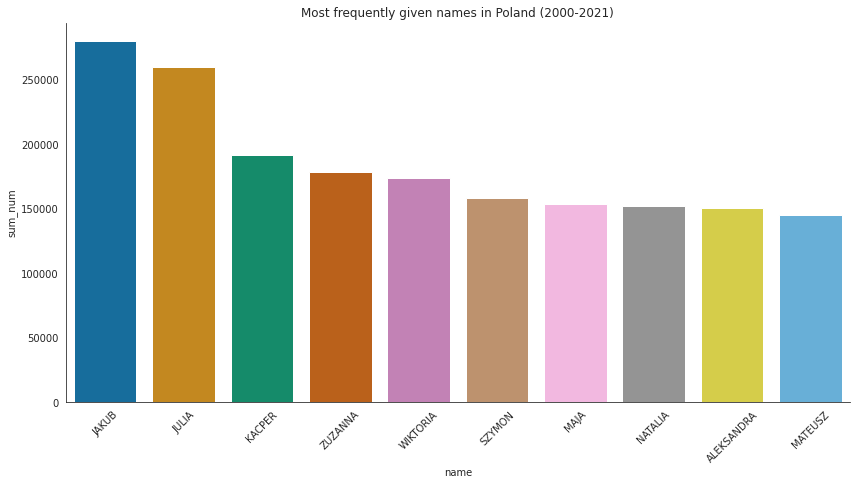

In [ ]:
#create a bar plot
title_top_10 = "Most frequently given names in Poland (2000-2021)"
sns.set_style("white")
sns.catplot(data = top_10, x = 'name', y = 'sum_num', kind = 'bar', height=6, aspect=16/8, palette = 'colorblind').set(title = title_top_10)
plt.xticks(rotation = 45) #rotate x labels by 45 degrees
plt.show()


RISE AND FALL OF JAKUB AND JULIA

We can see that two names dominate the scene: Jakub and Julia (with more than 250k occurences).

In [ ]:
#choose only data for name 'Jakub'
data_jakub = names_2000_2021.loc[names_2000_2021['name'] == 'JAKUB'] 
#choose only data for name 'Julia'
data_julia = names_2000_2021.loc[names_2000_2021['name'] == 'JULIA'] 

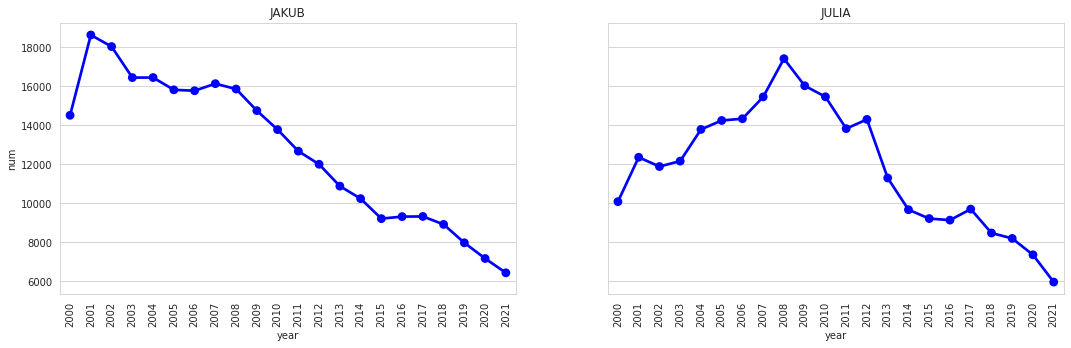

In [ ]:
#create function for subplot creation
def subplot_func(data1, x1, y1, title1, data2, x2, y2, title2, color):
    '''creates 2 pointplots with common y axis
    takes following as parameters: data1, x1, y1, title1, data2, x2, y2, title2, color'''
    #create 2 axes objects
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (18,5), sharey = True) #two subplots with shared y axis
    sns.pointplot(data = data1, x = x1, y = y1, ci = None, ax = ax0, color = color) #create pointplot data1
    ax0.set(title = title1)
    ax0.tick_params('x', labelrotation = 90)
    sns.pointplot(data = data2, x = x2, y = y2, ci = None, ax = ax1, color = color) #pointplot data2
    ax1.set(title = title2, ylabel = None)
    ax1.tick_params('x', labelrotation = 90)
    sns.set_style('whitegrid') #set style of plots
    plt.show()

#run subplot_func to create graph for JAKUB and JULIA
subplot_func(data_jakub, 'year', 'num', 'JAKUB', data_julia, 'year', 'num', 'JULIA', color = 'blue')

We can see that both Jakub and Julia were already very popular in year 2000. Their popularity peaked in 2001 and 2008 respectively. After that a decreasing trend can be observed.
Can this decrease be accounted only to popularity drop?
Or maybe fewer children have been born in recent years?
To answer this we need to calculate total number of names given per year.

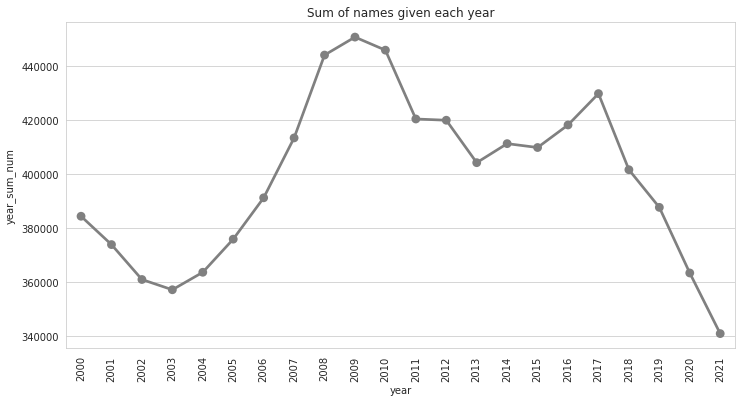

In [ ]:
#create 'year_sum_num' column: sum of names given each year.
names_2000_2021['year_sum_num'] = names_2000_2021.groupby('year')['num'].transform('sum')
#create a subset 'year_total'
year_total = names_2000_2021[['year', 'year_sum_num']].drop_duplicates()
#create a pointplot
plt.figure(figsize = (12,6))
sns.pointplot(data = year_total, x = 'year', y = 'year_sum_num', ci = None, color = 'grey').set(title = "Sum of names given each year") 
plt.xticks(rotation = 90)
plt.show()

It is clear now that the sum of names given each each fluctuates heavily. Value for year 2008 and 2021 differ by more than 100k!
Above graph corresponds to the graph of Julias per year. On both, peaks in 2017 can be observed.
So, it's probably not that Julia's popularity has increased again in 2017. Just more babies were born that year.

MOST STABLE AND LEAST STABLE

To understand which names are the most stable and which are the least, we need to calculate, for each name, ratio between maximum number of occurences and minimum number of occurences.

In [ ]:
#create column: ratio of max_num to min_num 'ratio_max_min'
names_2000_2021['ratio_max_min'] = names_2000_2021['max_num'] / names_2000_2021['min_num']

In [ ]:
#create a 'stability_subset' of data to find the most and least stable names
stability_subset = names_2000_2021[['name', 'sum_num', 'ratio_max_min']].drop_duplicates() #choose only 'name', 'sum_num' and 'ratio_max_min' from 'names_2000_2021' drop duplicates
stability_subset = stability_subset.loc[stability_subset['sum_num'] > 5000] #filter only for names that have more than 5000 occurences
most_stable = stability_subset.sort_values(by = 'ratio_max_min', ascending=True)[:10] #find 10 names with the lowest 'ratio_max_min'
print(most_stable)

         name  sum_num  ratio_max_min
55   GABRIELA    66182       1.661739
124      EMIL     9066       1.773333
73      ARTUR    20274       1.830579
112   URSZULA    10831       1.882857
38       ADAM    96397       1.934337
79       SARA    18451       1.940217
153    MARIKA     7998       2.000000
109    DOROTA     8484       2.015748
18     SZYMON   158306       2.094921
45     HUBERT    50068       2.107378


In [ ]:
least_stable = stability_subset.sort_values(by = 'ratio_max_min', ascending=False)[:10] #find 10 names with the highest 'ratio_max_min'
print(least_stable)

          name  sum_num  ratio_max_min
1584       MIA     6809     229.000000
320       LEON    37389     165.500000
299      TYMON    32062     114.054054
368       NELA    12630     109.250000
187       LENA   118439      98.885246
61    ANGELIKA    12062      82.600000
194     AMELIA   113463      69.356522
271    LILIANA    32926      66.716981
363   LILIANNA    11512      64.304348
222     IGNACY    30870      56.779221


We can see that GARBIELA and EMIL lead the way in the most stable names. On the other hand, the least stable are MIA and LEON.
Let's put them on a graph together.

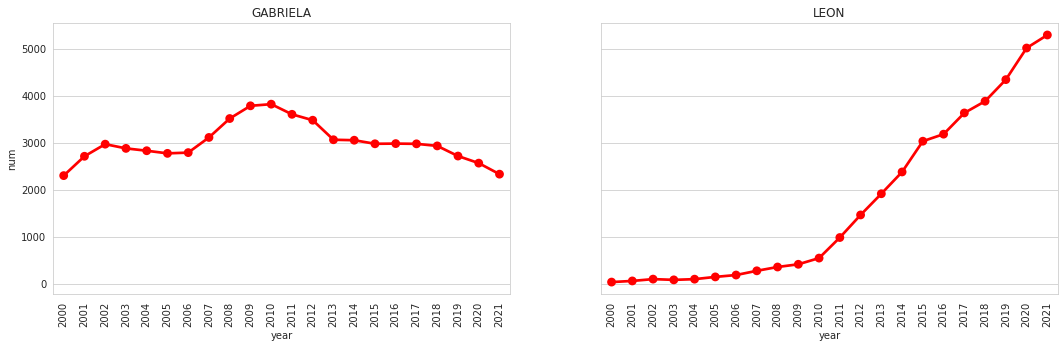

In [ ]:
#choose only data for name 'GARBIELA'
data_gabriela = names_2000_2021.loc[names_2000_2021['name'] == 'GABRIELA']
#choose only data for name 'LEON'
data_leon = names_2000_2021.loc[names_2000_2021['name'] == 'LEON']
#create a subplot
subplot_func(data_gabriela, 'year', 'num', 'GABRIELA', data_leon, 'year', 'num', 'LEON', color = 'red')

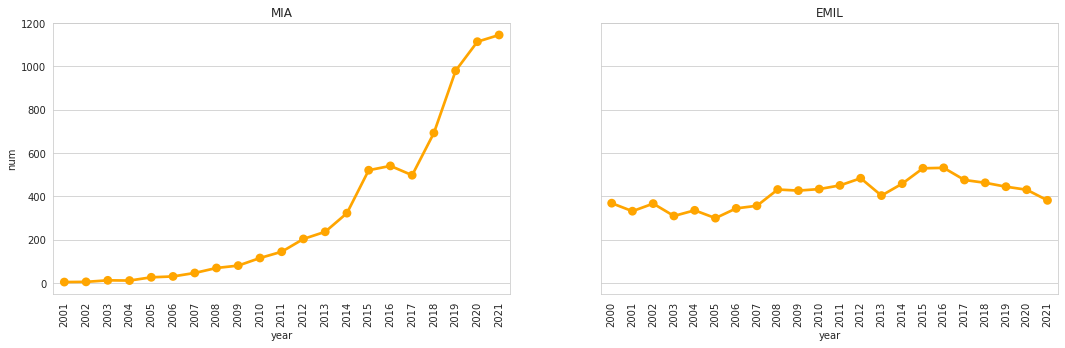

In [ ]:
#choose only data for name 'MIA'
data_mia = names_2000_2021.loc[names_2000_2021['name'] == 'MIA']
#choose only data for name 'EMIL'
data_emil = names_2000_2021.loc[names_2000_2021['name'] == 'EMIL']
#create a subplot
subplot_func(data_mia, 'year', 'num', 'MIA', data_emil, 'year', 'num', 'EMIL', color = 'orange')